In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from myAdagrad import myAdagrad
from SCAdagrad import SCAdagrad
seed =1000
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


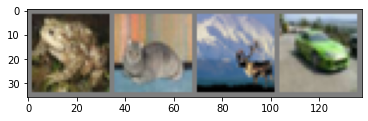

frog  cat   deer  car  


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


#net = Net()
net= torchvision.models.resnet18()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adagrad(net.parameters(), lr=0.001)
#optimizer  = optim.Adam(net.parameters(), lr =0.0001)
#optimizer = optim.SGD(net.parameters(),lr = 0.001,momentum=0.9)
optimizer = myAdagrad(net.parameters(), lr=0.01)
#optimizer = SCAdagrad(net.parameters(), lr=0.001)



In [6]:
for epoch in range(200):  # loop over the dataset multiple times

    running_loss = 0.0
    #loss_store1 = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        #loss_store1.append(running_loss)
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.403
[1,  4000] loss: 2.078
[1,  6000] loss: 1.935
[1,  8000] loss: 1.849
[1, 10000] loss: 1.771
[1, 12000] loss: 1.699
[2,  2000] loss: 1.618
[2,  4000] loss: 1.561
[2,  6000] loss: 1.515
[2,  8000] loss: 1.436
[2, 10000] loss: 1.436
[2, 12000] loss: 1.373
[3,  2000] loss: 1.295
[3,  4000] loss: 1.287
[3,  6000] loss: 1.247
[3,  8000] loss: 1.249
[3, 10000] loss: 1.227
[3, 12000] loss: 1.200
[4,  2000] loss: 1.119
[4,  4000] loss: 1.096
[4,  6000] loss: 1.125
[4,  8000] loss: 1.103
[4, 10000] loss: 1.081
[4, 12000] loss: 1.069
[5,  2000] loss: 0.955
[5,  4000] loss: 0.975
[5,  6000] loss: 1.000
[5,  8000] loss: 1.002
[5, 10000] loss: 0.965
[5, 12000] loss: 0.948
[6,  2000] loss: 0.880
[6,  4000] loss: 0.879
[6,  6000] loss: 0.897
[6,  8000] loss: 0.873
[6, 10000] loss: 0.902
[6, 12000] loss: 0.886
[7,  2000] loss: 0.823
[7,  4000] loss: 0.838
[7,  6000] loss: 0.805
[7,  8000] loss: 0.805
[7, 10000] loss: 0.797
[7, 12000] loss: 0.817
[8,  2000] loss: 0.724
[8,  4000] 

In [ ]:
PATH = './cifar_res_Adam.pth'
torch.save(net.state_dict(),PATH)


In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


Accuracy of the network on the 10000 test images: 10 %
